<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_9/Module_9_1_Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameters

Кілька прикладів гіперпараметрів, які оптимізують для нейронних мереж:

1. **Кількість шарів (layers)**: Кількість шарів у нейронній мережі визначається глибиною моделі.
2. **Кількість нейронів у кожному шарі (nodes)**: Це кількість нейронів у кожному шарі нейронної мережі.
3. **Швидкість навчання (learning rate)**: Це параметр, який визначає, наскільки швидко модель навчається під час процесу навчання.
4. **Функції активації (activation functions)**: Вони використовуються для передачі сигналів між нейронами у шарах.
5. **Батч-розмір (batch size)**: Кількість прикладів навчання, які використовуються в одному кроці оптимізації.
6. **Кількість епох (epochs)**: Це кількість разів, коли весь набір даних пройшов через нейронну мережу під час навчання.
7. **Регуляризація (regularization)**: Такі як L1 або L2 регуляризація, які допомагають уникнути перенавчання.
8. **Тип оптимізатора (optimizer)**: Алгоритм, який використовується для оновлення ваг моделі під час навчання.

   
Тощо.

In [16]:
import pandas as pd

In [18]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
# датасет по виявленню шахрайства з кредитною карткою
df = pd.read_csv("../../data/creditcard.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv("creditcard.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
len(df[df["Class"] == 1])# / len(df)

492

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(df)

284807

In [11]:
(len(df[df["Class"] == 1]) / len(df)) * 100

0.1727485630620034

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the Credit Card Fraud Detection dataset
# (Передбачається, що змінна df вже містить завантажений DataFrame)

# Separate features and target variable
X = df.drop('Class', axis=1)  # Вилучаємо колонку 'Class', яка є цільовою змінною, і залишаємо лише ознаки (features)
y = df['Class']               # Зберігаємо цільову змінну (0 — звичайна транзакція, 1 — шахрайська) в окрему змінну

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Розбиваємо дані на тренувальні та тестові набори (80% на тренування, 20% на тест)
# stratify=y — гарантує, що пропорція класів буде збережена в обох наборах

# Standardize the data
scaler = StandardScaler()            # Створюємо об’єкт для стандартизації (нормалізація до нульового середнього і одиничної дисперсії)
X_train = scaler.fit_transform(X_train)  # Навчаємо стандартизатор на тренувальних даних і трансформуємо їх
X_test = scaler.transform(X_test)        # Трансформуємо тестові дані з використанням параметрів, знайдених на тренувальних

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)       # Конвертуємо тренувальні ознаки у формат тензора PyTorch
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # Конвертуємо цільову змінну тренувального набору у тензор
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)         # Конвертуємо тестові ознаки
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)    # Конвертуємо тестову цільову змінну

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)  # Створюємо набір даних (Dataset) із ознак і міток
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
# Обертаємо dataset в DataLoader — обробляє дані пакетами по 128 прикладів і перемішує їх кожну епоху (shuffle=True)

In [13]:
train_dataset[0]

(tensor([ 1.4116,  0.9934, -0.4560, -0.8941, -0.4673,  1.0892,  3.0244, -1.1949,
          0.9571,  1.2814, -0.1445, -0.1108,  0.5093,  0.0621, -0.0696,  1.4511,
          0.4044, -0.9074,  0.1691, -0.5554, -0.1731,  0.1032,  0.4096,  0.4907,
          1.1420, -0.6708, -0.8072,  0.1919, -0.0991, -0.3225]),
 tensor(0.))

In [14]:
train_loader.__dict__

{'dataset': <torch.utils.data.dataset.TensorDataset at 0x7eafc5d39e90>,
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 'in_order': True,
 '_dataset_kind': 0,
 'batch_size': 128,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x7eaeb4d97e10>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x7eaeb4ca8210>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [15]:
# use other metric rather than accuracy
# (використовуємо іншу метрику, оскільки точність (accuracy) може бути оманливою при дисбалансі класів)

predictions = torch.tensor([0]*len(y_test))  # if we naively classify all as 0
# Симулюємо наївний класифікатор, який завжди передбачає клас 0 (нормальні транзакції)
# У випадку з fraud detection це може дати високу точність, якщо шахрайських транзакцій мало

accuracy = (predictions == y_test_tensor).float().mean()
# Порівнюємо передбачення з істинними значеннями (True → 1.0, False → 0.0)
# Обчислюємо середнє значення, тобто точність (accuracy)

accuracy.item()
# Виводимо числове значення точності

# Це базовий тест, щоб побачити, яку accuracy отримаєш, якщо взагалі не намагатися вгадувати шахрайство.
# Це допомагає зрозуміти, наскільки обманлива може бути метрика accuracy при дисбалансі класів.

0.9982795715332031

In [16]:
y_test_tensor.sum()

tensor(98.)

In [ ]:
len(y_test_tensor)

56962

In [18]:
# Імпортуємо метрики з модуля sklearn.metrics:
# - f1_score: гармонійне середнє між точністю (precision) і повнотою (recall)
# - precision_score: точність (скільки з передбачених як шахрайство — дійсно шахрайство)
# - recall_score: чутливість або повнота (скільки справжніх шахрайств було знайдено)
from sklearn.metrics import f1_score, precision_score, recall_score

# Функція для оцінки якості передбачення
def evaluate(y_test, predictions):
    # recall (чутливість): наскільки добре модель виявляє всі позитивні (1) випадки
    # У задачі виявлення шахрайства це надзвичайно важливо: краще зайвий раз запідозрити, ніж пропустити.
    print("Recall score (pos. 1):", recall_score(y_test.numpy(), predictions.numpy()))

    # precision (точність): наскільки правильно модель передбачає шахрайство серед усіх, які вона позначила як шахрайство
    # Інакше кажучи — наскільки часто модель не піднімає фальшиву тривогу
    print("Precision score (pos. 1):", precision_score(y_test.numpy(), predictions.numpy()))

    # f1_score: гармонійне середнє між recall і precision
    # Важливо у випадках, коли є сильний класовий дисбаланс, як у задачі з шахрайством
    print("F1 score (pos. 1):", f1_score(y_test.numpy(), predictions.numpy()))

    # weighted F1: середнє F1 всіх класів, зважене за кількістю зразків кожного класу
    # Цей варіант краще показує загальну продуктивність моделі на незбалансованих наборах даних
    print("F1 score (weighted):", f1_score(y_test.numpy(), predictions.numpy(), average="weighted"))

    # micro F1: глобальні TP, FP і FN рахуються як одне ціле, F1 рахується на основі цих сум
    # Корисно, коли тебе цікавить загальний performance, а не по класах
    print("F1 score (micro):", f1_score(y_test.numpy(), predictions.numpy(), average="micro"))

    # macro F1: обчислюється F1 score по кожному класу, потім усереднюється (без врахування частки класу)
    # Хороша метрика, щоб перевірити як модель поводиться з **малими класами**, наприклад, "шахрайство"
    print("F1 score (macro):", f1_score(y_test.numpy(), predictions.numpy(), average="macro"))

# Виклик функції evaluate для оцінки моделі
evaluate(y_test_tensor, predictions)


Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (macro): 0.4995695183877146


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Build and optimize

### 1. Number of Layers

In [19]:
# Build the neural network model

class FraudDetectionModel_1(nn.Module):  # Клас моделі, що наслідує nn.Module (базовий клас у PyTorch для нейронних мереж)
    def __init__(self):
        super().__init__()  # Ініціалізація батьківського класу
        # Перший повнозв'язний шар: з кількістю входів, що дорівнює кількості ознак у даних, і 128 нейронів на виході
        self.fc1 = nn.Linear(X_train.shape[1], 128)

        # Функція активації ReLU — додає нелінійність у модель
        self.relu1 = nn.ReLU()

        # Другий повнозв'язний шар: з 128 входів до одного вихідного нейрона (оскільки це бінарна класифікація)
        self.fc2 = nn.Linear(128, 1)

        # Сігмоподібна функція активації — обмежує вихід у діапазоні [0, 1], інтерпретується як ймовірність класу "1"
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Прохід уперед через перший шар
        x = self.fc1(x)

        # Активація після першого шару
        x = self.relu1(x)

        # Прохід через другий шар
        x = self.fc2(x)

        # Приведення виходу до ймовірності (0-1)
        x = self.sigmoid(x)

        return x



In [21]:
# Функція запуску експерименту: тренування, запис втрат, оцінка точності
def run_experiment(model, loss_recording_list, lr=0.01, train_loader=train_loader, epochs=1, optimizer=optim.SGD):
    # Визначаємо функцію втрат (Binary Cross Entropy) для бінарної класифікації
    criterion = nn.BCELoss()

    # Ініціалізація оптимізатора (наприклад, стохастичний градієнтний спуск - SGD)
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # Задаємо швидкість навчання (learning rate)
    else:
        optimizer = optimizer(model.parameters())         # Якщо lr не задано, використовуємо стандартні параметри

    # Створюємо список для збереження втрат по епохах
    loss_res = []

    # Проходимо по кількості епох (ітерацій повного навчального набору)
    for epoch in range(epochs):
        model.train()  # Переводимо модель у режим тренування

        # Пройдемо всі батчі (партії) з train_loader
        for inputs, labels in train_loader:
            optimizer.zero_grad()             # Обнуляємо старі градієнти перед новим кроком
            outputs = model(inputs)           # Прогін уперед: отримуємо передбачення моделі
            loss = criterion(outputs.squeeze(), labels)  # Обчислюємо втрату (враховуючи squeeze для вирівнювання форм)
            loss_res.append(loss.item())      # Зберігаємо значення втрати (loss) для поточного батча
            loss.backward()                   # Обчислюємо градієнти (зворотне поширення помилки)
            optimizer.step()                  # Оновлюємо параметри моделі згідно з обчисленими градієнтами

        # Виводимо втрату для останнього батча епохи
        print("Loss:", loss.item())

    # Додаємо масив втрат поточного запуску до загального списку (для аналізу або візуалізації)
    loss_recording_list.append(loss_res)

    # Переводимо модель у режим оцінки (evaluation), вимикаючи dropout/нормалізації, якщо є
    model.eval()
    with torch.no_grad():  # Вимикаємо обчислення градієнтів (для економії ресурсів під час оцінки)
        outputs = model(X_test_tensor)                         # Отримуємо передбачення моделі для тестових даних
        predictions = (outputs.squeeze() > 0.5).float()        # Перетворюємо ймовірності у класи (0 або 1)

    # Викликаємо функцію оцінки моделі — обчислює метрики як-то F1, Precision, Recall
    evaluate(y_test_tensor, predictions)


In [22]:
losses_experiment_1 = []

In [23]:
model_1 = FraudDetectionModel_1()
run_experiment(model_1, losses_experiment_1)

Loss: 0.00725106056779623
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (macro): 0.4995695183877146


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


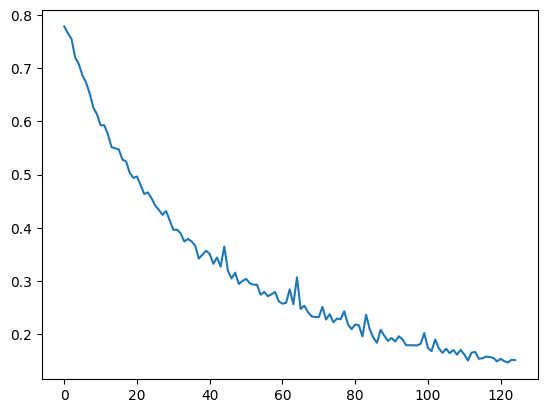

In [24]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis[:125], line[:125])

In [25]:
# Add one more layer

class FraudDetectionModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [26]:
losses_experiment_2 = []

In [27]:
model_2 = FraudDetectionModel_2()

run_experiment(model_2, losses_experiment_2)

Loss: 0.004065650515258312
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (macro): 0.4995695183877146


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


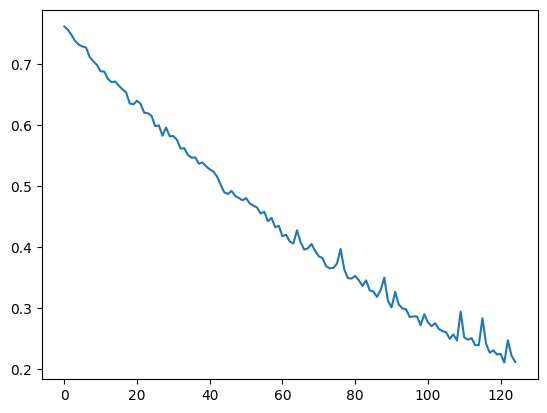

In [28]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_2[0]))
for line in losses_experiment_2:
    plt.plot(x_axis[:125], line[:125])

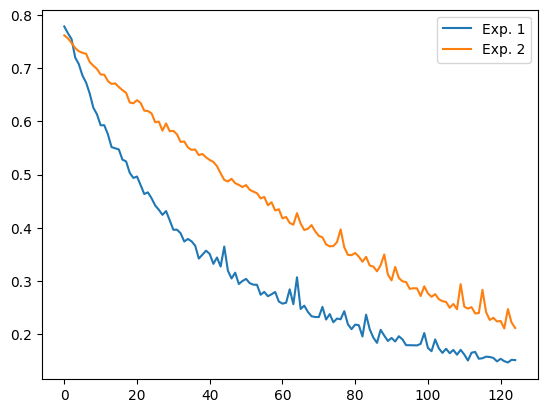

In [29]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.legend()

### 2. Number of Nodes

In [34]:
# Add more nodes

class FraudDetectionModel_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [31]:
losses_experiment_3 = []

In [36]:
model_3 = FraudDetectionModel_3()

run_experiment(model_3, losses_experiment_3)

Loss: 1.1178134679794312
Recall score (pos. 1): 0.061224489795918366
Precision score (pos. 1): 1.0
F1 score (pos. 1): 0.11538461538461539
F1 score (weighted): 0.9976711645276214
F1 score (micro): 0.9983848881710614
F1 score (macro): 0.5572881607936958


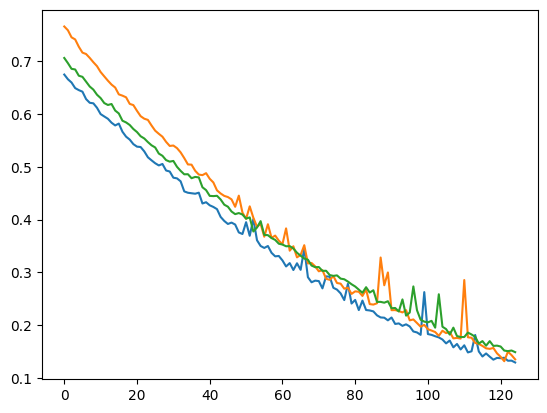

In [43]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_3[0]))
for line in losses_experiment_3:
    plt.plot(x_axis[:125], line[:125])

plt.show()

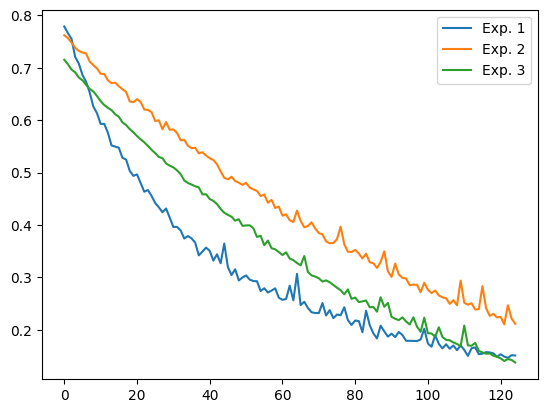

In [41]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")

plt.legend()

In [44]:
# Return to the simple model and increase number of nodes


class FraudDetectionModel_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [45]:
losses_experiment_4 = []

In [50]:
model_4 = FraudDetectionModel_4()
run_experiment(model_4, losses_experiment_4)

Loss: 0.008394199423491955
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (macro): 0.4995695183877146


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


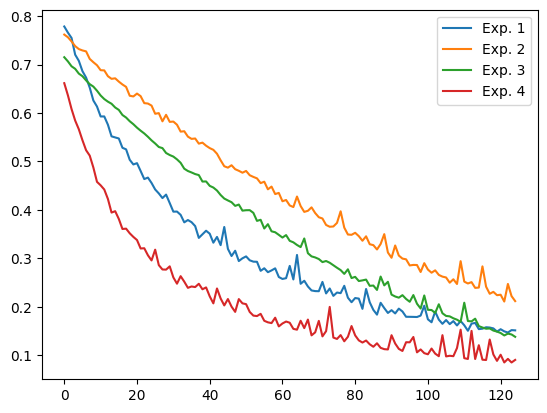

In [51]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")


plt.legend()

### 3. Learning rate

In [52]:
losses_experiment_5 = []

In [53]:
model_5 = FraudDetectionModel_4()

run_experiment(model_5, losses_experiment_5, lr=0.02)


Loss: 0.0044485582038760185
Recall score (pos. 1): 0.3673469387755102
Precision score (pos. 1): 0.7659574468085106
F1 score (pos. 1): 0.496551724137931
F1 score (weighted): 0.9984933539838772
F1 score (micro): 0.998718443874864
F1 score (macro): 0.7479550647337807


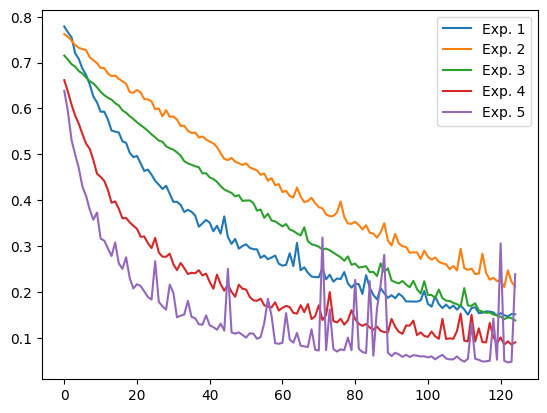

In [54]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")


plt.legend()

### 4. Activation function

https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

In [55]:
# Replace ReLU with PReLU


class FraudDetectionModel_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [56]:
losses_experiment_6 = []

In [57]:
model_6 = FraudDetectionModel_6()

run_experiment(model_6, losses_experiment_6, lr=0.02)

Loss: 0.0040762340649962425
Recall score (pos. 1): 0.3979591836734694
Precision score (pos. 1): 0.78
F1 score (pos. 1): 0.527027027027027
F1 score (weighted): 0.9985720904200057
F1 score (micro): 0.9987711105649381
F1 score (macro): 0.7632058915194198


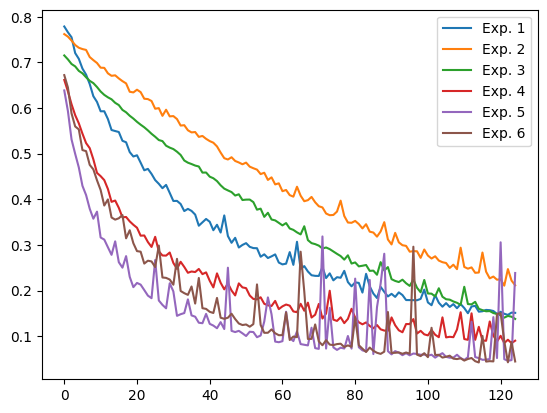

In [58]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")


plt.legend()

### Batch Size

In [59]:
train_loader_new = DataLoader(train_dataset, batch_size=128*2, shuffle=True)

In [60]:
losses_experiment_7 = []

In [61]:
model_7 = FraudDetectionModel_6()

run_experiment(model_7, losses_experiment_7, lr=0.02, train_loader=train_loader_new)

Loss: 0.005758116487413645
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (macro): 0.4995695183877146


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


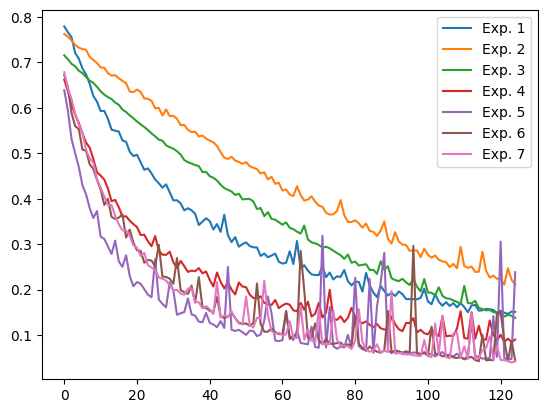

In [62]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")


plt.legend()

### 6. Epochs

In [63]:
losses_experiment_8 = []

In [64]:
model_8 = FraudDetectionModel_6()

run_experiment(model_8, losses_experiment_8, lr=0.02, epochs=3)

Loss: 0.003714370308443904
Loss: 0.000939835503231734
Loss: 0.0020901623647660017
Recall score (pos. 1): 0.7142857142857143
Precision score (pos. 1): 0.813953488372093
F1 score (pos. 1): 0.7608695652173914
F1 score (weighted): 0.9992024075431775
F1 score (micro): 0.9992275552122467
F1 score (macro): 0.8802413590110167


/tmp/ipython-input-65-2020599601.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


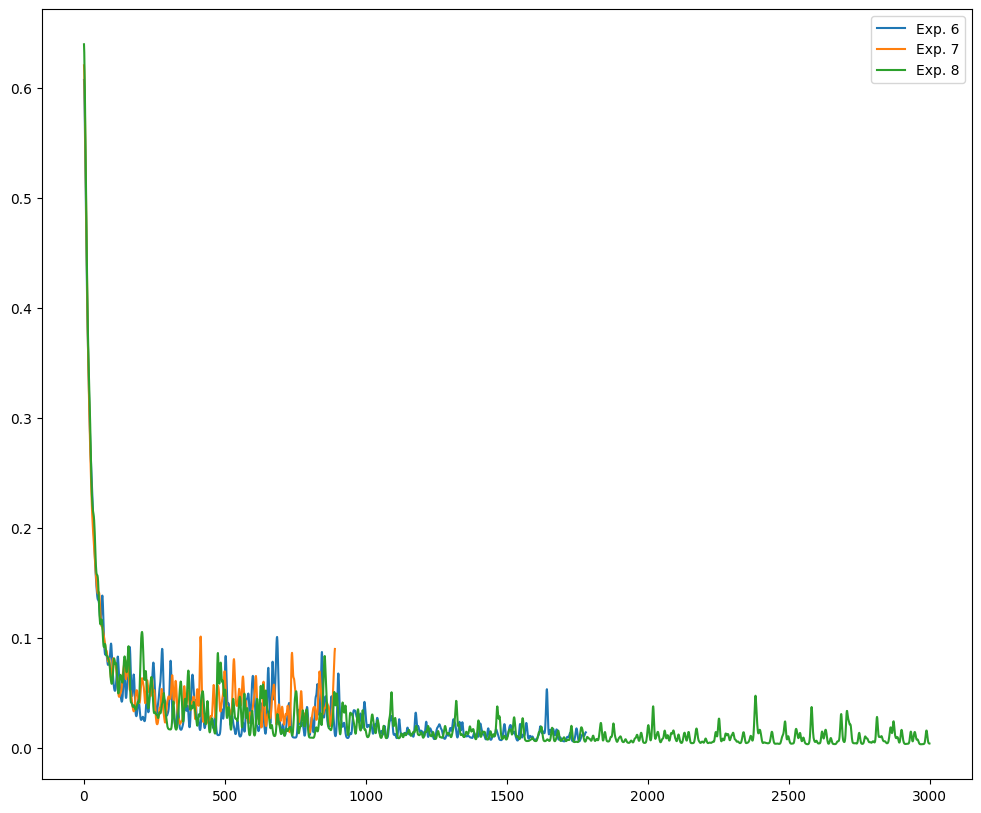

In [65]:
# Compare
from scipy.ndimage.filters import gaussian_filter1d

x_axis_short = range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long = range(len(losses_experiment_8[0]))

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)

plt.figure(figsize=(12, 10))


#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_1_mean[800:], sigma=3), label="Exp. 1")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_2_mean[800:], sigma=3), label="Exp. 2")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_3_mean[800:], sigma=3), label="Exp. 3")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_4_mean[800:], sigma=3), label="Exp. 4")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_5_mean[800:], sigma=3), label="Exp. 5")
plt.plot(x_axis_short[:], gaussian_filter1d(losses_experiment_6_mean[:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[:], gaussian_filter1d(losses_experiment_7_mean[:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[:3000], gaussian_filter1d(losses_experiment_8_mean[:3000], sigma=3), label="Exp. 8")


plt.legend()

In [66]:
# How do we know where to stop?

def run_experiment_with_early_stopping(model, loss_recording_list, lr=0.01, train_loader=train_loader, val_loader=None, epochs=1, patience=5, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()

    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())

    # Train the model
    train_loss_res = []
    val_loss_res = []

    best_val_loss = float('inf')
    no_improvement_count = 0

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            train_loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}")

        # Calculate validation loss
        if val_loader:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs.squeeze(), val_labels).item()
            avg_val_loss = val_loss / len(val_loader)
            val_loss_res.append(avg_val_loss)
            print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss}")

            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                    break

    loss_recording_list.append({'train_loss': train_loss_res, 'val_loss': val_loss_res})

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    evaluate(y_test_tensor, predictions)



In [67]:
losses_experiment_8_2 = []

In [73]:
model_8_2 = FraudDetectionModel_6()

# Create PyTorch DataLoader
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

run_experiment_with_early_stopping(model_8_2, losses_experiment_8_2, val_loader=val_loader, lr=0.02, epochs=20, patience=2)

Epoch 1/20, Training Loss: 0.0026063495315611362
Epoch 1/20, Validation Loss: 0.011327953088815604
Epoch 2/20, Training Loss: 0.003022395772859454
Epoch 2/20, Validation Loss: 0.008150734649730988
Epoch 3/20, Training Loss: 0.00100507284514606
Epoch 3/20, Validation Loss: 0.00733986036849914
Epoch 4/20, Training Loss: 0.0010248415637761354
Epoch 4/20, Validation Loss: 0.006271475756508528
Epoch 5/20, Training Loss: 0.0007242093561217189
Epoch 5/20, Validation Loss: 0.005814277412020862
Epoch 6/20, Training Loss: 0.0005567962070927024
Epoch 6/20, Validation Loss: 0.005377985145390293
Epoch 7/20, Training Loss: 0.05361413210630417
Epoch 7/20, Validation Loss: 0.0047539851980361114
Epoch 8/20, Training Loss: 0.0005997731350362301
Epoch 8/20, Validation Loss: 0.004097654140186851
Epoch 9/20, Training Loss: 0.0004202517739031464
Epoch 9/20, Validation Loss: 0.004084875182673594
Epoch 10/20, Training Loss: 0.00019629462622106075
Epoch 10/20, Validation Loss: 0.0037677211829486214
Epoch 11/20

In [74]:
losses_experiment_8_2_train = losses_experiment_8_2[len(losses_experiment_8_2)-1]['train_loss']
losses_experiment_8_2_test = losses_experiment_8_2[len(losses_experiment_8_2)-1]['val_loss']

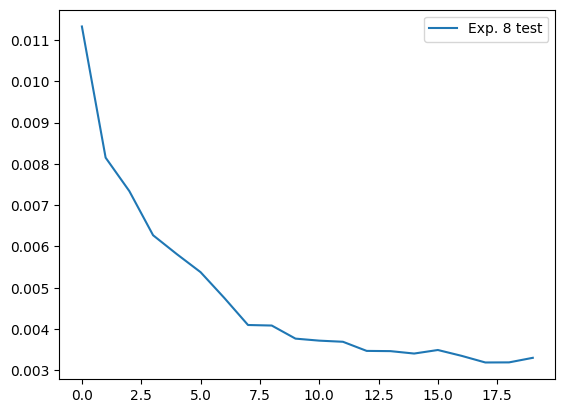

In [75]:

# plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=1), label="Exp. 8")
# plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean_test[start:end], sigma=1), label="Exp. 8 test")

x_axis_train = [i for i in range(len(losses_experiment_8_2_train))]
#plt.plot(x_axis_train, losses_experiment_8_2_train, label="Exp. 8")

factor = len(x_axis_train) // len(losses_experiment_8_2_test)
#x_axis_test = [(i+1)*factor for i in range(len(losses_experiment_8_2_test))]
x_axis_test = [i for i in range(len(losses_experiment_8_2_test))]
plt.plot(x_axis_test, losses_experiment_8_2_test, label="Exp. 8 test")


plt.legend()

### 7. Regularization

In [76]:
# Add dropout


class FraudDetectionModel_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [77]:
losses_experiment_9 = []

In [78]:
model_9 = FraudDetectionModel_7()

run_experiment(model_9, losses_experiment_9, lr=0.02, epochs=3)

Loss: 0.004371277056634426
Loss: 0.003934239968657494
Loss: 0.0014873057371005416
Recall score (pos. 1): 0.6224489795918368
Precision score (pos. 1): 0.8472222222222222
F1 score (pos. 1): 0.7176470588235294
F1 score (weighted): 0.9990929900159071
F1 score (micro): 0.9991573329588147
F1 score (macro): 0.8586125478199086


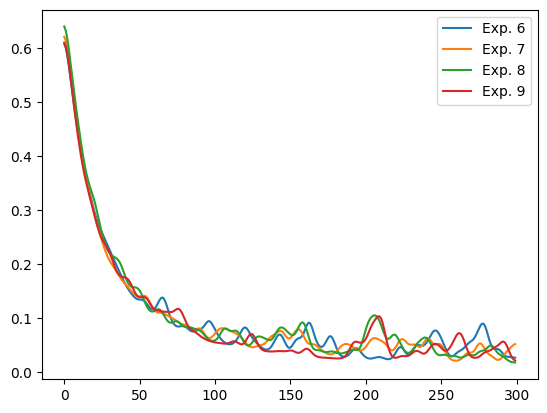

In [79]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)

start = 0
end = 300
plt.plot(x_axis_short[start:end], gaussian_filter1d(losses_experiment_6_mean[start:end], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:end], gaussian_filter1d(losses_experiment_7_mean[start:end], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")



plt.legend()

### 8. Optimizer

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [84]:
losses_experiment_10 = []

In [85]:
model_10 = FraudDetectionModel_7()
# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
run_experiment(model_10, losses_experiment_10, lr=None, epochs=3, optimizer=optim.Adam)

Loss: 0.00027679637423716486
Loss: 2.0800851416424848e-05
Loss: 0.0001725280744722113
Recall score (pos. 1): 0.47959183673469385
Precision score (pos. 1): 0.9791666666666666
F1 score (pos. 1): 0.6438356164383562
F1 score (weighted): 0.9989309946309802
F1 score (micro): 0.9990871107053826
F1 score (macro): 0.8216892930404969


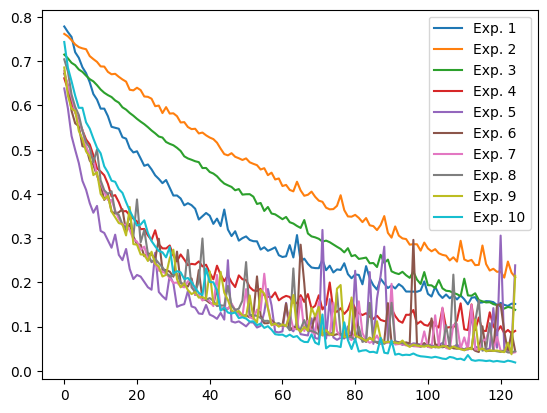

In [87]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")
plt.plot(x_axis[:125], losses_experiment_8_mean[:125], label="Exp. 8")
plt.plot(x_axis[:125], losses_experiment_9_mean[:125], label="Exp. 9")
plt.plot(x_axis[:125], losses_experiment_10_mean[:125], label="Exp. 10")


plt.legend()

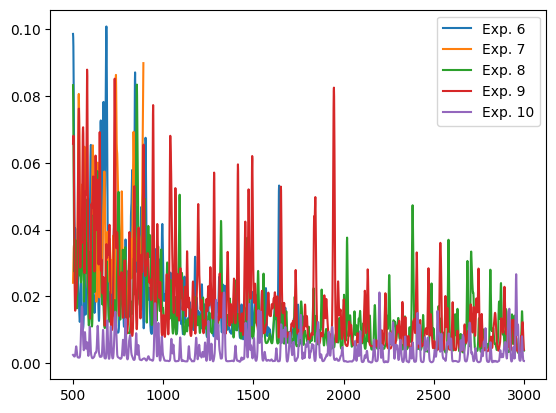

In [88]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)

start = 500
end = 3000
plt.plot(x_axis_short[start:], gaussian_filter1d(losses_experiment_6_mean[start:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:], gaussian_filter1d(losses_experiment_7_mean[start:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_10_mean[start:end], sigma=3), label="Exp. 10")



plt.legend()

## Hyperparameter Optimization

### Grid Search

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, TransformerMixin

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(nn.ReLU())
            input_size = num_nodes

        self.model = nn.Sequential(*layers)

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Define a custom PyTorch estimator for scikit-learn compatibility
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()
        return predictions.numpy()

    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



# Create a pipeline with the PyTorch model
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__num_layers': [1, 2, 3],
    'model__num_nodes': [32, 64, 128],
    'model__lr': [0.001, 0.01, 0.1]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tensor, y_train_tensor)

# Print best hyperparameters and corresponding F1 score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized 

In [ ]:
# Завантаження датасету виявлення шахрайства з кредитних карток

# Відокремлюємо ознаки (всі колонки крім 'Class') та цільову змінну ('Class')
X = df.drop('Class', axis=1)  # Вхідні дані - ознаки для навчання
y = df['Class']               # Мітки класів: 0 - нормальна операція, 1 - шахрайство

# Розділяємо дані на тренувальну та тестову вибірки (80% тренування, 20% тест)
# stratify=y зберігає співвідношення класів у вибірках (важливо при дисбалансі)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабуємо (стандартизуємо) дані, щоб кожна ознака мала середнє 0 і стандартне відхилення 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Навчаємось на тренувальних даних
X_test = scaler.transform(X_test)        # Тестові трансформуємо за тими ж параметрами

# Конвертуємо numpy-масиви в тензори PyTorch для подальшого навчання нейронної мережі
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Створюємо PyTorch Dataset та DataLoader для зручного подання батчів
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Перемішуємо дані для кращого навчання

# Визначаємо модель нейронної мережі для виявлення шахрайства
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        # Динамічно створюємо послідовність повнозв’язних шарів з активацією ReLU
        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))  # Лінійний шар
            layers.append(nn.ReLU())                         # Активація ReLU
            input_size = num_nodes

        self.model = nn.Sequential(*layers)  # Об’єднуємо шари у послідовність

        # Останній шар видає одне число (ймовірність класу 1)
        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()  # Для конвертації в ймовірність від 0 до 1

    def forward(self, x):
        x = self.model(x)              # Прохід через повнозв’язні шари + ReLU
        x = self.output_layer(x)       # Останній лінійний шар
        x = self.sigmoid(x)            # Перетворення в ймовірність
        return x

# Створюємо власний sklearn-совісний обгорток для PyTorch моделі
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        # Зберігаємо параметри моделі, функції втрат, оптимізатора, параметри навчання
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        # Створюємо датасет і лоадер для батчів
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        # Ініціалізуємо оптимізатор з параметрами моделі та швидкістю навчання
        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        # Навчання протягом кількості епох
        for epoch in range(self.epochs):
            self.model.train()  # Вмикаємо режим тренування (наприклад, dropout)
            for inputs, labels in train_loader:
                optimizer.zero_grad()                 # Очищаємо старі градієнти
                outputs = self.model(inputs)          # Передбачення моделі
                loss = self.criterion(outputs.squeeze(), labels)  # Обчислюємо втрати
                loss.backward()                      # Зворотне поширення (градієнти)
                optimizer.step()                     # Оновлення ваг

        return self

    def predict(self, X):
        self.model.eval()  # Режим оцінки (вимикаємо dropout, batch norm тощо)
        with torch.no_grad():  # Без обчислення градієнтів (швидше і економить пам’ять)
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()  # Перетворюємо ймовірності у 0 або 1
        return predictions.numpy()  # Повертаємо як numpy масив (щоб сумісно зі sklearn)

    # Методи для отримання та встановлення параметрів (потрібні sklearn)
    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Створюємо pipeline для sklearn з нашою PyTorch моделлю
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Визначаємо сітку гіперпараметрів для пошуку найкращих
param_grid = {
    'model__num_layers': [1, 2, 3],    # Кількість шарів мережі
    'model__num_nodes': [32, 64, 128], # Кількість нейронів у шарах
    'model__lr': [0.001, 0.01, 0.1]    # Швидкість навчання
}

# Визначаємо метрику F1 для оцінки моделі під час GridSearchCV
f1_scorer = make_scorer(f1_score)

# Створюємо GridSearchCV для підбору гіперпараметрів
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Навчаємо модель на тренувальних даних із пошуком найкращих параметрів
grid_search.fit(X_train_tensor, y_train_tensor)

# Виводимо найкращі гіперпараметри і відповідний F1 бал
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


## Bonus: Experiment Tracking with **MLflow**

https://www.mlflow.org/docs/latest/tracking.html#logging-data-to-runs

https://mlflow.org/docs/latest/getting-started/logging-first-model/notebooks/logging-first-model.html

https://www.google.com/search?q=mlops&oq=mlops&gs_lcrp=EgZjaHJvbWUyCQgAEEUYORiABDIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCTI1MzNqMGoxNagCCLACAfEFJJXGFtj1FhHxBSSVxhbY9RYR&sourceid=chrome&ie=UTF-8

In [ ]:
# # 1. запустить у терміналі

# mlflow server \
#   --backend-store-uri sqlite:///mlruns.db \
#   --default-artifact-root ./artifacts \
#   --host 0.0.0.0 \
#   --port 8080

In [21]:
'''
$mlflow server --host 127.0.0.1 --port 8080
'''

'\n$mlflow server --host 127.0.0.1 --port 8080\n'

In [22]:
# Experiment tracking
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")
client

In [25]:
all_experiments = client.search_experiments()
all_experiments

[<Experiment: artifact_location='/home/sergio/artifacts/0', creation_time=1751482547627, experiment_id='0', last_update_time=1751482547627, lifecycle_stage='active', name='Default', tags={}>]

In [26]:

# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
experiment = mlflow.set_experiment("Python_Data_Models")
# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "HP_opt"

# Define an artifact path that the model will be saved to.


2025/07/02 21:00:23 INFO mlflow.tracking.fluent: Experiment with name 'Python_Data_Models' does not exist. Creating a new experiment.


## Bonus: Bayesian Optimization

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna


# We use here Bayesian optimization
### Optuna uses a history record of trials to determine which hyperparameter values to try next.
### Using this data, it estimates a promising area and tries values in that area.
###Optuna then estimates an even more promising region based on the new result.
###It repeats this process using the history data of trials completed thus far.
###Specifically, it employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.
# Alternatives: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html


# Display basic information about the dataset
print(df.info())

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel with hyperparameters
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes, activation, dropout_rate):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(get_activation(activation))
            layers.append(nn.Dropout(dropout_rate))
            input_size = num_nodes

        self.model = nn.Sequential(*layers[:-2])  # Exclude the last activation and dropout

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

def get_activation(activation):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'tanh':
        return nn.Tanh()
    elif activation == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation function: {activation}")

# Define the objective function for Optuna
def objective(trial):
    print("Starting experiment")
    input_size = X_train.shape[1]
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = trial.suggest_int('num_nodes', 32, 256)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 30)

    model = FraudDetectionModel(input_size, num_layers, num_nodes, activation, dropout_rate)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())

    # Log metrics with MLflow
    with mlflow.start_run(run_name=run_name) as run:
        mlflow.log_params({
            'num_layers': num_layers,
            'num_nodes': num_nodes,
            'activation': activation,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        })
        mlflow.log_metric('f1_score', f1)
    print("Ran experiment. 'f1_score'", f1)

    return f1  # Optimize for F1 score

# Run the hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding F1 score
print(f"Best F1 Score: {-study.best_value:.4f}")
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")


[I 2025-07-02 20:29:16,689] A new study created in memory with name: no-name-2288b13e-0e05-4b2c-ab30-d28b973f8df0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[I 2025-07-02 20:31:15,313] Trial 0 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 121, 'activation': 'sigmoid', 'dropout_rate': 0.3305070938951926, 'learning_rate': 0.08148243143986947, 'batch_size': 32, 'epochs': 18}. Best is trial 0 with value: 0.0.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/50cf8fe196fb40ea83e467d7a707f2bb
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:32:51,105] Trial 1 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 237, 'activation': 'sigmoid', 'dropout_rate': 0.38324300379789167, 'learning_rate': 0.08193299696712979, 'batch_size': 128, 'epochs': 21}. Best is trial 0 with value: 0.0.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/633c29257a7e4506befdadc180bd400b
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:35:02,403] Trial 2 finished with value: 0.003434980722046968 and parameters: {'num_layers': 3, 'num_nodes': 157, 'activation': 'sigmoid', 'dropout_rate': 0.38067959579479616, 'learning_rate': 0.07617414272879733, 'batch_size': 64, 'epochs': 23}. Best is trial 2 with value: 0.003434980722046968.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/8c0ed93feefb4dde8f76ec48e714f38f
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.003434980722046968
Starting experiment


[I 2025-07-02 20:35:22,565] Trial 3 finished with value: 0.7941176470588235 and parameters: {'num_layers': 2, 'num_nodes': 134, 'activation': 'relu', 'dropout_rate': 0.3807693106964232, 'learning_rate': 0.004680825447990921, 'batch_size': 128, 'epochs': 8}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/83a4357d4e7b4f1eb7951a0d167880c0
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7941176470588235
Starting experiment


[I 2025-07-02 20:37:14,493] Trial 4 finished with value: 0.7452830188679245 and parameters: {'num_layers': 1, 'num_nodes': 198, 'activation': 'tanh', 'dropout_rate': 0.03061616665555611, 'learning_rate': 0.0992765014438039, 'batch_size': 32, 'epochs': 26}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/2b99222b44144589bf7039be9f8541e6
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7452830188679245
Starting experiment


[I 2025-07-02 20:38:22,384] Trial 5 finished with value: 0.5047318611987381 and parameters: {'num_layers': 1, 'num_nodes': 195, 'activation': 'sigmoid', 'dropout_rate': 0.41727324407741984, 'learning_rate': 0.07595069820587437, 'batch_size': 32, 'epochs': 16}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/07137803390041fd9441230546243e2e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.5047318611987381
Starting experiment


[I 2025-07-02 20:39:15,851] Trial 6 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 185, 'activation': 'sigmoid', 'dropout_rate': 0.2543206859431473, 'learning_rate': 0.027761242128980682, 'batch_size': 64, 'epochs': 15}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/a22e7b3648ad45bea5a41638aabda708
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:39:41,315] Trial 7 finished with value: 0.36619718309859156 and parameters: {'num_layers': 2, 'num_nodes': 72, 'activation': 'tanh', 'dropout_rate': 0.14374161979452527, 'learning_rate': 0.06509395745062066, 'batch_size': 64, 'epochs': 8}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/0e06a33d8fae442e8e94060f75e0b66d
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.36619718309859156
Starting experiment


[I 2025-07-02 20:40:37,083] Trial 8 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 190, 'activation': 'sigmoid', 'dropout_rate': 0.03742322113629176, 'learning_rate': 0.023752498037504722, 'batch_size': 32, 'epochs': 10}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/ec3dd40b7f2c449695d7033dfab9e694
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:41:18,730] Trial 9 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 40, 'activation': 'relu', 'dropout_rate': 0.07033982697184449, 'learning_rate': 0.06783754360026355, 'batch_size': 32, 'epochs': 8}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/c96a8052079645f69ad439a37f1b392c
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:42:50,032] Trial 10 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 108, 'activation': 'relu', 'dropout_rate': 0.49827900230880157, 'learning_rate': 0.008979000589376649, 'batch_size': 128, 'epochs': 30}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/adb9d4b8b1e04734a3083e48ca7fa09c
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:43:44,100] Trial 11 finished with value: 0.7014218009478673 and parameters: {'num_layers': 1, 'num_nodes': 225, 'activation': 'tanh', 'dropout_rate': 0.1742471984022079, 'learning_rate': 0.09923703851011105, 'batch_size': 128, 'epochs': 27}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/38b7faa53d7040db86f43f842f9a23b8
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7014218009478673
Starting experiment


[I 2025-07-02 20:43:54,576] Trial 12 finished with value: 0.7476635514018691 and parameters: {'num_layers': 1, 'num_nodes': 147, 'activation': 'tanh', 'dropout_rate': 0.26133596248073293, 'learning_rate': 0.045239738979744384, 'batch_size': 128, 'epochs': 5}. Best is trial 3 with value: 0.7941176470588235.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/8c5198411a904774aa6a4f2aabcc5beb
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7476635514018691
Starting experiment


[I 2025-07-02 20:44:04,695] Trial 13 finished with value: 0.7960199004975125 and parameters: {'num_layers': 1, 'num_nodes': 142, 'activation': 'relu', 'dropout_rate': 0.26965904086556425, 'learning_rate': 0.03857536165034901, 'batch_size': 128, 'epochs': 5}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/e52d0727e49d4fb69a008449bcd9cd03
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7960199004975125
Starting experiment


[I 2025-07-02 20:44:27,325] Trial 14 finished with value: 0.7938144329896907 and parameters: {'num_layers': 1, 'num_nodes': 102, 'activation': 'relu', 'dropout_rate': 0.32834143866191146, 'learning_rate': 0.003198583948300221, 'batch_size': 128, 'epochs': 12}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/eddc8886bbe944eca3635bba0807fbd6
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7938144329896907
Starting experiment


[I 2025-07-02 20:44:38,441] Trial 15 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 77, 'activation': 'relu', 'dropout_rate': 0.19088140564411468, 'learning_rate': 0.040316275874921766, 'batch_size': 128, 'epochs': 5}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/81aaf9e0d2b042cea3163298878117b5
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2025-07-02 20:45:02,540] Trial 16 finished with value: 0.7960199004975125 and parameters: {'num_layers': 1, 'num_nodes': 158, 'activation': 'relu', 'dropout_rate': 0.44998278056913044, 'learning_rate': 0.01676383041011648, 'batch_size': 128, 'epochs': 12}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/62270b4e510f44d08631a5eb29559795
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7960199004975125
Starting experiment


[I 2025-07-02 20:45:27,246] Trial 17 finished with value: 0.751269035532995 and parameters: {'num_layers': 1, 'num_nodes': 167, 'activation': 'relu', 'dropout_rate': 0.48995334803221513, 'learning_rate': 0.023107184640868972, 'batch_size': 128, 'epochs': 13}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/bae4848a55174bbaab77487d85686ee8
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.751269035532995
Starting experiment


[I 2025-07-02 20:46:03,037] Trial 18 finished with value: 0.7473684210526316 and parameters: {'num_layers': 1, 'num_nodes': 256, 'activation': 'relu', 'dropout_rate': 0.4528369663349078, 'learning_rate': 0.03871228793262301, 'batch_size': 128, 'epochs': 19}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/d0dda8228b4d4ed5bdc6ed1b3d4d409e
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7473684210526316
Starting experiment


[I 2025-07-02 20:46:25,980] Trial 19 finished with value: 0.7319587628865979 and parameters: {'num_layers': 1, 'num_nodes': 86, 'activation': 'relu', 'dropout_rate': 0.296146029585522, 'learning_rate': 0.05452346488630204, 'batch_size': 128, 'epochs': 12}. Best is trial 13 with value: 0.7960199004975125.


🏃 View run HP_opt at: http://127.0.0.1:8080/#/experiments/1/runs/206cf2fc92dc4062a05bb93858817744
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/1
Ran experiment. 'f1_score' 0.7319587628865979
Best F1 Score: -0.7960
Best Hyperparameters:
num_layers: 1
num_nodes: 142
activation: relu
dropout_rate: 0.26965904086556425
learning_rate: 0.03857536165034901
batch_size: 128
epochs: 5
